# Points per Game by NBA Scoring Champions

Data is parsed from a [Wikipedia Page](https://en.wikipedia.org/wiki/List_of_National_Basketball_Association_annual_scoring_leaders) showing a table of NBA Scoring Champions and emptied into a .csv file. Every NBA Scoring Champion since 1946 is shown in relation to the total average points per game scored by every other NBA scoring champion.

In [3]:
import csv, re, os, requests
import pandas as pd
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup

In [4]:
# Parse Data from csv file
data = pd.read_csv(f'{os.getcwd()}/Data/nba_scoring_data.csv')
x_years = [int(y.replace("'", '')[1:5]) + 1 for y in data["b'Season'"]]
y_ppg = []
for points in data["b'Points pergame'"]:
    points = points.replace("'", '')[1:]
    y_ppg.append(float(f'{points[0:2]}.{points[2:]}'))

In [5]:
# Average Points per Game
avg_ppg = sum(y_ppg) / len(y_ppg)

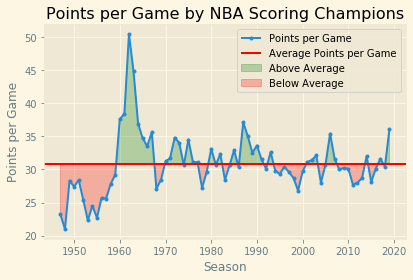

In [6]:
plt.style.use('Solarize_Light2')

plt.plot(x_years, y_ppg, marker='.', label='Points per Game')

# Players who score more than the average points per game are green
plt.fill_between(x_years, y_ppg, avg_ppg, alpha=0.25,
                interpolate=True, where=[y > avg_ppg for y in y_ppg],
                label='Above Average', color='green')

# Players who score less than the average points per game are red
plt.fill_between(x_years, y_ppg, avg_ppg, alpha=0.25,
                interpolate=True, where=[y <= avg_ppg for y in y_ppg],
                label='Below Average', color='red')

# Add horizontal line to show Average Points per Game
plt.axhline(y=avg_ppg, color='r', label='Average Points per Game')

plt.legend()
plt.title('Points per Game by NBA Scoring Champions')
plt.xlabel('Season')
plt.ylabel('Points per Game')
plt.tight_layout()